Dataset Shape: (7032, 20)

Churn Distribution:
 Churn
0    5163
1    1869
Name: count, dtype: int64


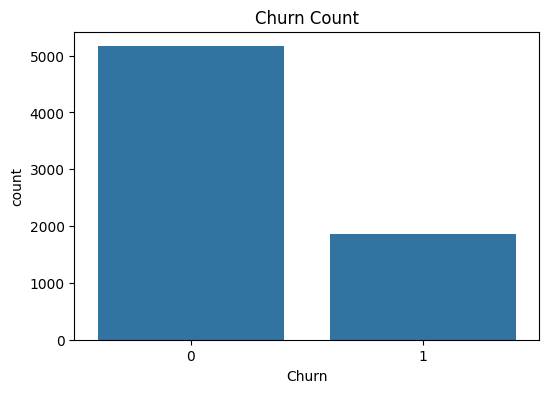

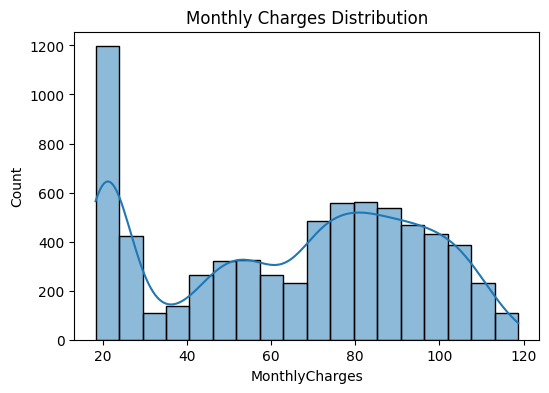

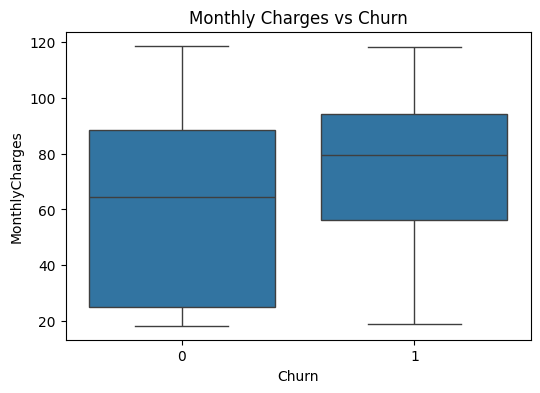

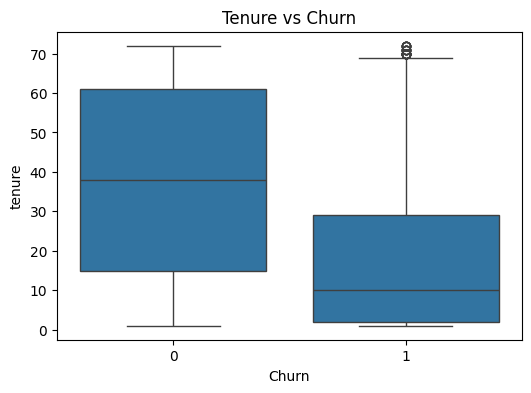

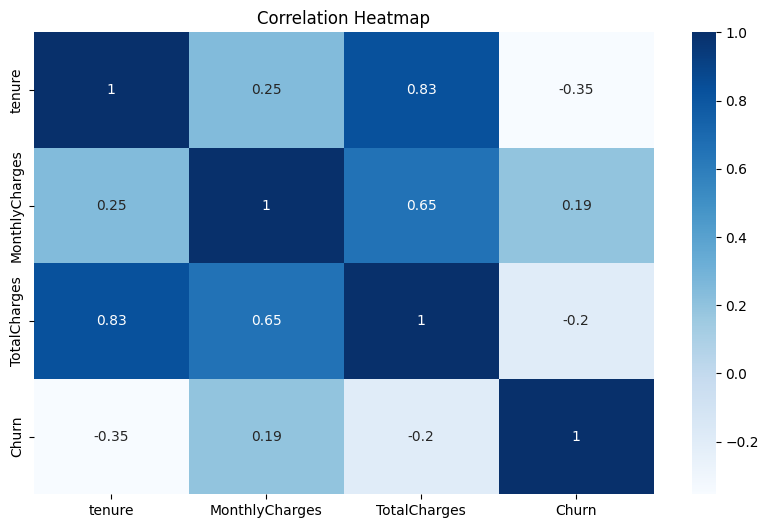


Average Monthly Charges (Churn vs Non-Churn):
Churn
0    61.307408
1    74.441332
Name: MonthlyCharges, dtype: float64

Average Tenure (Churn vs Non-Churn):
Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

Contract Type Churn:
Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


In [2]:
# Customer Churn Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\Ayush Bhagirath\Downloads\Telco_Customer_Churn.csv")

# -------------------------
# Data Cleaning
# -------------------------

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])
df = df.drop("customerID", axis=1)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df = df.reset_index(drop=True)

# -------------------------
# Exploratory Data Analysis
# -------------------------

print("Dataset Shape:", df.shape)
print("\nChurn Distribution:\n", df["Churn"].value_counts())

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# -------------------------
# Visualizations (with saving)
# -------------------------

# 1. Churn Count
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Count")
plt.savefig("churn_count.png", dpi=300, bbox_inches="tight")
plt.show()

# 2. Monthly Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Monthly Charges Distribution")
plt.savefig("monthly_charges_dist.png", dpi=300, bbox_inches="tight")
plt.show()

# 3. Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.savefig("monthly_charges_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()

# 4. Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.savefig("tenure_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ["Churn"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

# -------------------------
# Churn Insights
# -------------------------

print("\nAverage Monthly Charges (Churn vs Non-Churn):")
print(df.groupby("Churn")["MonthlyCharges"].mean())

print("\nAverage Tenure (Churn vs Non-Churn):")
print(df.groupby("Churn")["tenure"].mean())

print("\nContract Type Churn:")
print(df.groupby("Contract")["Churn"].mean())
